In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
house_data = pd.read_csv('bengaluru_house_prices.csv')

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [127]:
house_data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [128]:
df_1 = house_data.drop(['area_type', 'availability', 'balcony', 'society'], axis =1)

In [129]:
object_cols = [col for col in df_1.columns if df_1[col].dtype == 'object']

object_cols

['location', 'size', 'total_sqft']

In [130]:
df_1[object_cols].nunique()

location      1305
size            31
total_sqft    2117
dtype: int64

In [131]:
df_1.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [132]:
df_1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [133]:
df_2 = df_1.dropna()

In [134]:
df_2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [135]:
df_2[object_cols].nunique()

location      1304
size            31
total_sqft    2067
dtype: int64

In [136]:
df_2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [137]:
df_2['size'] = df_2['size'].apply(lambda x: int(x.strip().split()[0]))

/tmp/ipykernel_4357/3006242342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['size'] = df_2['size'].apply(lambda x: int(x.strip().split()[0]))


In [138]:
df_2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [139]:
df_2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [140]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [141]:
df_2[~df_2['total_sqft'].apply(lambda x: isfloat(x))]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [142]:
def convert_range_to_avg(x):
    tokens = x.strip().split('-')
    if len(tokens)  == 2:
        p, q = tokens
        return float((float(p)+float(q))/2)
    try:
        return float(x)
    except:
        return None

In [143]:
convert_range_to_avg('12668')

12668.0

In [144]:
df_3  = df_2.copy(deep=True)

In [145]:
df_3['total_sqft'] = df_3['total_sqft'].apply(lambda x: convert_range_to_avg(x))

In [146]:
df_3['total_sqft'].isnull().sum()

46

In [147]:
df_4 = df_3.copy(deep=True)

In [148]:
df_4['price_per_sqft'] = (df_4['price'] * 100000) / df_4['total_sqft']

In [149]:
df_4['location'] = df_4['location'].apply(lambda x: x.strip())

In [150]:
loc_stat = df_4.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [151]:
loc_stas_less_than_10 = loc_stat[loc_stat <= 10]
loc_stas_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [152]:
df_4['location'] = df_4['location'].apply(lambda x: 'other' if x in loc_stas_less_than_10 else x)

In [155]:
# df_4.location. ()

In [156]:
df_4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [157]:
df_5 = df_4[~((df_4['total_sqft']/df_4['size'])< 300)]
df_5

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [158]:
df_5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [159]:
def remove_outliers(df: pd.DataFrame):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        max_threshold = sub_df.price_per_sqft.mean() + sub_df.price_per_sqft.std()
        min_threshold = sub_df.price_per_sqft.mean() - sub_df.price_per_sqft.std()
        reduced_df = sub_df[(sub_df.price_per_sqft > min_threshold) & (sub_df.price_per_sqft <= max_threshold)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_6 = remove_outliers(df_5)
df_6.describe()

,size,total_sqft,bath,price,price_per_sqft
count,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000
mean,2.572636,1503.912322,2.474589,91.041286,5659.951479
std,0.896839,875.702017,0.981961,86.236450,2272.592354
min,1.000000,300.000000,1.000000,10.000000,1250.000000
25%,2.000000,1108.000000,2.000000,49.000000,4239.329087
50%,2.000000,1282.000000,2.000000,67.000000,5173.279759
75%,3.000000,1650.000000,3.000000,100.000000,6428.571429
max,16.000000,30400.000000,16.000000,2200.000000,24509.803922


In [186]:
def plot_scatter_char_loc(df, location):
    bhk_2 = df[(df.location == location) & (df.size == 2)]
    bhk_3 = df[(df.location == location) & (df.size == 3)]
    # print(bhk_2)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color = 'blue', label = '2 bhk', s = 50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker = '+', color = 'green', label = '3 bhk', s = 50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

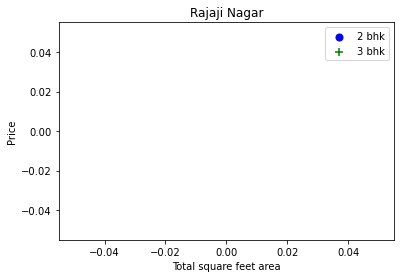

In [187]:
plot_scatter_char_loc(df_6, 'Rajaji Nagar')

# df_6.groupby(['location', 'size']).description.agg(['size'])



<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

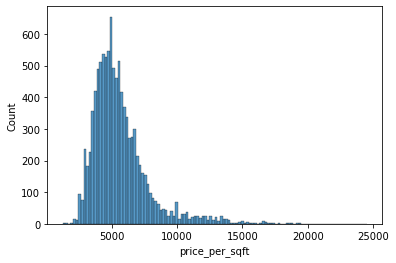

In [188]:
sns.histplot(df_6.price_per_sqft)

In [189]:
df_7 = df_6[df_6['bath'] < df_6['size'] + 2]

In [190]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10196 entries, 0 to 10290
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10196 non-null  object 
 1   size            10196 non-null  int64  
 2   total_sqft      10196 non-null  float64
 3   bath            10196 non-null  float64
 4   price           10196 non-null  float64
 5   price_per_sqft  10196 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 557.6+ KB
